Figure(1440x432)


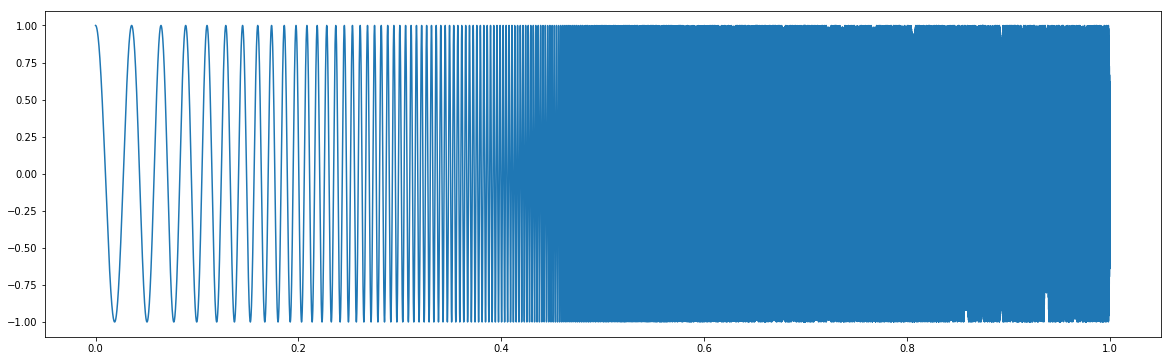

In [60]:
%matplotlib inline

import scipy
import scipy.signal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

xs = np.linspace(0, 1, 32000)
ys = scipy.signal.chirp(xs, 25, 1, 16000, method='logarithmic')


f = plt.figure(figsize=(20, 6))
ax = f.add_subplot(1, 1, 1)
ax.plot(xs, ys)
print(f)

import IPython.display

IPython.display.Audio(ys, rate=32000)
